# <center>Machine Learning project
<br>
<center>Presented by: <b>Assaad Saneh</b><br>

<img src="ASL.png">

# <center> The Alphabet:<br>

<img src="asl-sign-language-hand-alphabet-teacher-qwerty-designs.jpg">

## Importing libraries

In [1]:
import cv2
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras

## Extracting features from images

### Using Mediapipe hand detection solution

<img src="hand-landmarks.png">

In [2]:
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)

In [3]:
image = mp.Image.create_from_file("F_test.jpg")
detection_result = detector.detect(image)

In [4]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

MARGIN = 10  # pixels
FONT_SIZE = 1
FONT_THICKNESS = 1
HANDEDNESS_TEXT_COLOR = (88, 205, 54) # vibrant green

def draw_landmarks_on_image(rgb_image, detection_result):
  hand_landmarks_list = detection_result.hand_landmarks
  handedness_list = detection_result.handedness
  annotated_image = np.copy(rgb_image)

  # Loop through the detected hands to visualize.
  for idx in range(len(hand_landmarks_list)):
    hand_landmarks = hand_landmarks_list[idx]
    handedness = handedness_list[idx]

    # Draw the hand landmarks.
    hand_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    hand_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in hand_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      hand_landmarks_proto,
      solutions.hands.HAND_CONNECTIONS,
      solutions.drawing_styles.get_default_hand_landmarks_style(),
      solutions.drawing_styles.get_default_hand_connections_style())

    # Get the top left corner of the detected hand's bounding box.
    height, width, _ = annotated_image.shape
    x_coordinates = [landmark.x for landmark in hand_landmarks]
    y_coordinates = [landmark.y for landmark in hand_landmarks]
    text_x = int(min(x_coordinates) * width)
    text_y = int(min(y_coordinates) * height) - MARGIN

    # Draw handedness (left or right hand) on the image.
    cv2.putText(annotated_image, f"{handedness[0].category_name}",
                (text_x, text_y), cv2.FONT_HERSHEY_DUPLEX,
                FONT_SIZE, HANDEDNESS_TEXT_COLOR, FONT_THICKNESS, cv2.LINE_AA)

  return annotated_image

In [5]:
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)

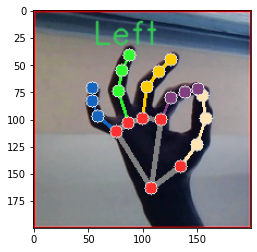

In [6]:
plt.imshow(annotated_image)

#### Data augmentation through flipping (this will help us detect signs from both left and right hands)

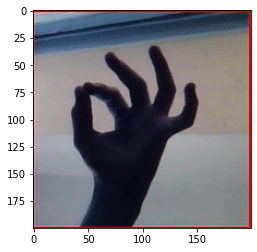

In [7]:
cv_mat = cv2.imread('F_test.jpg')
rgb_frame = mp.Image(image_format=mp.ImageFormat.SRGB, data=cv_mat)
fimg = cv2.flip(cv2.imread('F_test.jpg'),1)
fimgmp =  mp.Image(image_format=mp.ImageFormat.SRGB, data=fimg)
plt.imshow(fimg)

### Creating Dataset
Dataset link: <a hrel="https://www.kaggle.com/datasets/grassknoted/asl-alphabet">https://www.kaggle.com/datasets/grassknoted/asl-alphabet</a>

In [8]:
alphabets = {}

# Get image from dataset
base_dir = './archive'
train_dir = os.path.join(base_dir, 'asl_alphabet_train')

list_subfolders_with_paths = [f.path for f in os.scandir(train_dir) if f.is_dir()]

for i in list_subfolders_with_paths:
    if i.split('\\')[2] != 'nothing':
        alphabets[i.split('\\')[2]] = [f.path for f in os.scandir(i) if f.path.endswith('.jpg')]

dataset = pd.DataFrame.from_dict(alphabets)
classes = list(dataset.columns)

In [9]:
dataset

,A,B,C,D,del,E,F,G,H,I,...,R,S,space,T,U,V,W,X,Y,Z
0,./archive\asl_alphabet_train\A\A1.jpg,./archive\asl_alphabet_train\B\B1.jpg,./archive\asl_alphabet_train\C\C1.jpg,./archive\asl_alphabet_train\D\D1.jpg,./archive\asl_alphabet_train\del\del1.jpg,./archive\asl_alphabet_train\E\E1.jpg,./archive\asl_alphabet_train\F\F1.jpg,./archive\asl_alphabet_train\G\G1.jpg,./archive\asl_alphabet_train\H\H1.jpg,./archive\asl_alphabet_train\I\I1.jpg,...,./archive\asl_alphabet_train\R\R1.jpg,./archive\asl_alphabet_train\S\S1.jpg,./archive\asl_alphabet_train\space\space1.jpg,./archive\asl_alphabet_train\T\T1.jpg,./archive\asl_alphabet_train\U\U1.jpg,./archive\asl_alphabet_train\V\V1.jpg,./archive\asl_alphabet_train\W\W1.jpg,./archive\asl_alphabet_train\X\X1.jpg,./archive\asl_alphabet_train\Y\Y1.jpg,./archive\asl_alphabet_train\Z\Z1.jpg
1,./archive\asl_alphabet_train\A\A10.jpg,./archive\asl_alphabet_train\B\B10.jpg,./archive\asl_alphabet_train\C\C10.jpg,./archive\asl_alphabet_train\D\D10.jpg,./archive\asl_alphabet_train\del\del10.jpg,./archive\asl_alphabet_train\E\E10.jpg,./archive\asl_alphabet_train\F\F10.jpg,./archive\asl_alphabet_train\G\G10.jpg,./archive\asl_alphabet_train\H\H10.jpg,./archive\asl_alphabet_train\I\I10.jpg,...,./archive\asl_alphabet_train\R\R10.jpg,./archive\asl_alphabet_train\S\S10.jpg,./archive\asl_alphabet_train\space\space10.jpg,./archive\asl_alphabet_train\T\T10.jpg,./archive\asl_alphabet_train\U\U10.jpg,./archive\asl_alphabet_train\V\V10.jpg,./archive\asl_alphabet_train\W\W10.jpg,./archive\asl_alphabet_train\X\X10.jpg,./archive\asl_alphabet_train\Y\Y10.jpg,./archive\asl_alphabet_train\Z\Z10.jpg
2,./archive\asl_alphabet_train\A\A100.jpg,./archive\asl_alphabet_train\B\B100.jpg,./archive\asl_alphabet_train\C\C100.jpg,./archive\asl_alphabet_train\D\D100.jpg,./archive\asl_alphabet_train\del\del100.jpg,./archive\asl_alphabet_train\E\E100.jpg,./archive\asl_alphabet_train\F\F100.jpg,./archive\asl_alphabet_train\G\G100.jpg,./archive\asl_alphabet_train\H\H100.jpg,./archive\asl_alphabet_train\I\I100.jpg,...,./archive\asl_alphabet_train\R\R100.jpg,./archive\asl_alphabet_train\S\S100.jpg,./archive\asl_alphabet_train\space\space100.jpg,./archive\asl_alphabet_train\T\T100.jpg,./archive\asl_alphabet_train\U\U100.jpg,./archive\asl_alphabet_train\V\V100.jpg,./archive\asl_alphabet_train\W\W100.jpg,./archive\asl_alphabet_train\X\X100.jpg,./archive\asl_alphabet_train\Y\Y100.jpg,./archive\asl_alphabet_train\Z\Z100.jpg
3,./archive\asl_alphabet_train\A\A1000.jpg,./archive\asl_alphabet_train\B\B1000.jpg,./archive\asl_alphabet_train\C\C1000.jpg,./archive\asl_alphabet_train\D\D1000.jpg,./archive\asl_alphabet_train\del\del1000.jpg,./archive\asl_alphabet_train\E\E1000.jpg,./archive\asl_alphabet_train\F\F1000.jpg,./archive\asl_alphabet_train\G\G1000.jpg,./archive\asl_alphabet_train\H\H1000.jpg,./archive\asl_alphabet_train\I\I1000.jpg,...,./archive\asl_alphabet_train\R\R1000.jpg,./archive\asl_alphabet_train\S\S1000.jpg,./archive\asl_alphabet_train\space\space1000.jpg,./archive\asl_alphabet_train\T\T1000.jpg,./archive\asl_alphabet_train\U\U1000.jpg,./archive\asl_alphabet_train\V\V1000.jpg,./archive\asl_alphabet_train\W\W1000.jpg,./archive\asl_alphabet_train\X\X1000.jpg,./archive\asl_alphabet_train\Y\Y1000.jpg,./archive\asl_alphabet_train\Z\Z1000.jpg
4,./archive\asl_alphabet_train\A\A1001.jpg,./archive\asl_alphabet_train\B\B1001.jpg,./archive\asl_alphabet_train\C\C1001.jpg,./archive\asl_alphabet_train\D\D1001.jpg,./archive\asl_alphabet_train\del\del1001.jpg,./archive\asl_alphabet_train\E\E1001.jpg,./archive\asl_alphabet_train\F\F1001.jpg,./archive\asl_alphabet_train\G\G1001.jpg,./archive\asl_alphabet_train\H\H1001.jpg,./archive\asl_alphabet_train\I\I1001.jpg,...,./archive\asl_alphabet_train\R\R1001.jpg,./archive\asl_alphabet_train\S\S1001.jpg,./archive\asl_alphabet_train\space\space1001.jpg,./archive\asl_alphabet_train\T\T1001.jpg,./archive\asl_alphabet_train\U\U1001.jpg,./archive\asl_alphabet_train\V\V1001.jpg,./archive\asl_alphabet_train\W\W1001.jpg,./

### Creating .csv file (DO NOT RUN THOSE CELLS IF YOU ALREADY HAVE THE .CSV FILE) 

In [10]:
file_list = {}

for idx in dataset:
    file_list[idx] = dataset[idx].values
    
landmarks = ['class']
for val in range(21):
     landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
for idx, files in file_list.items():
    for file in files:
        try:
            # getting landmarks for original and flipped images
            image = cv2.imread(file)
            image_fliped = cv2.flip(image,1)
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image_fliped = cv2.cvtColor(image_fliped, cv2.COLOR_BGR2RGB)
            
            image = mp.Image(image_format=mp.ImageFormat.SRGB, data=image)
            image_fliped = mp.Image(image_format=mp.ImageFormat.SRGB, data=image_fliped)

            detection_result = detector.detect(image)
            detection_result_fliped = detector.detect(image_fliped)

            landmarks = [] 
            landmarks_fliped = []
            
            
            # writing the coordinates to the .csv dataset
            for i in detection_result.hand_landmarks[0]:
                landmarks.append(i.x)
                landmarks.append(i.y)
                landmarks.append(i.z)
                
            landmarks_row = list(np.array(landmarks).flatten())
            landmarks_row.insert(0, file.split('\\')[2])
            
            with open('hand_dataset_final.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(landmarks_row)
                
            # writing the coordinates of the flipped hand to the .csv dataset
            for i in detection_result_fliped.hand_landmarks[0]:
                landmarks_fliped.append(i.x)
                landmarks_fliped.append(i.y)
                landmarks_fliped.append(i.z)
                
            landmarks_fliped_row = list(np.array(landmarks_fliped).flatten())
            landmarks_fliped_row.insert(0, file.split('\\')[2])
            
            with open('hand_dataset_final.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(landmarks_fliped_row)
                
            
        except:
            pass
        

## Exploratory Data Analysis, Preprocessing, dim reduction

In [10]:
df4 = pd.read_csv('hand_dataset4.csv')
df4

,class,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20
0,A,0.441170,0.579908,-1.463698e-07,0.565186,0.508961,-0.030005,0.634230,0.383416,-0.041656,...,-0.049812,0.381163,0.317218,-0.105233,0.392002,0.400469,-0.095807,0.393710,0.453162,-0.072677
1,A,0.530729,0.603803,-1.380083e-06,0.424499,0.502735,-0.030361,0.359329,0.366892,-0.046537,...,-0.035473,0.602870,0.319761,-0.084789,0.580763,0.403030,-0.079612,0.583904,0.466064,-0.058142
2,A,0.477503,0.609889,-2.625950e-07,0.592091,0.544300,-0.033601,0.670831,0.415301,-0.049104,...,-0.067616,0.422880,0.355803,-0.113152,0.431145,0.438622,-0.103791,0.429102,0.487163,-0.084636
3,A,0.503408,0.634047,-1.417657e-06,0.388903,0.539285,-0.033487,0.319699,0.405358,-0.050580,...,-0.034890,0.557988,0.349860,-0.087198,0.537704,0.436860,-0.086973,0.543151,0.502858,-0.069293
4,A,0.715760,0.672876,-3.593083e-07,0.803339,0.618437,-0.028361,0.853366,0.509800,-0.036164,...,-0.034534,0.627855,0.458478,-0.075215,0.635363,0.514935,-0.071314,0.644623,0.561842,-0.055937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125747,Z,0.535153,0.789218,7.059824e-08,0.405424,0.715478,-0.096216,0.323507,0.604757,-0.124260,...,-0.002631,0.530566,0.375355,-0.085208,0.545891,0.458141,-0.084328,0.551025,0.529136,-0.058588
125748,Z,0.466893,0.745559,3.364999e-07,0.602160,0.717048,-0.095103,0.698249,0.613155,-0.115532,...,-0.033929,0.471063,0.383083,-0.104364,0.460425,0.468919,-0.108918,0.460028,0.517385,-0.096632
125749,Z,0.545458,0.784947,6.569248e-09,0.415955,0.718456,-0.092922,0.328838,0.604114,-0.118980,...,-0.006808,0.536198,0.371494,-0.087360,0.556865,0.456374,-0.081894,0.561623,0.527390,-0.053049
125750,Z,0.466473,0.747360,5.071083e-07,0.612618,0.711079,-0.121129,0.698139,0.599634,-0.152395,...,-0.019802,0.466315,0.378317,-0.092407,0.455623,0.467481,-0.101546,0.453885,0.517640,-0.091805


In [11]:
df4[df4.duplicated()]

,class,x0,y0,z0,x1,y1,z1,x2,y2,z2,...,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20


<AxesSubplot:xlabel='class', ylabel='count'>

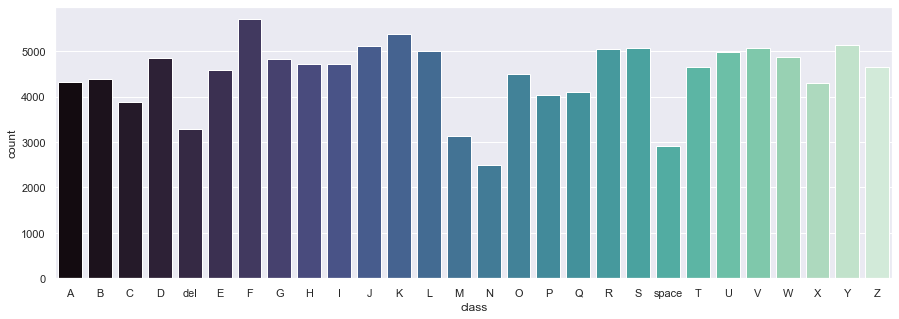

In [12]:
sns.set(rc={'figure.figsize':(15,5)})

sns.countplot(x=df4['class'], palette = "mako")

#### Getting rid of the z coordinates

In [13]:
df5 = df4.loc[:, ~df4.columns.str.contains("z")]
df5

,class,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
0,A,0.441170,0.579908,0.565186,0.508961,0.634230,0.383416,0.656471,0.269263,0.637962,...,0.453397,0.474961,0.330391,0.324018,0.381163,0.317218,0.392002,0.400469,0.393710,0.453162
1,A,0.530729,0.603803,0.424499,0.502735,0.359329,0.366892,0.348361,0.257724,0.356873,...,0.515724,0.485305,0.680286,0.337519,0.602870,0.319761,0.580763,0.403030,0.583904,0.466064
2,A,0.477503,0.609889,0.592091,0.544300,0.670831,0.415301,0.694522,0.298817,0.677304,...,0.494733,0.508691,0.363780,0.339681,0.422880,0.355803,0.431145,0.438622,0.429102,0.487163
3,A,0.503408,0.634047,0.388903,0.539285,0.319699,0.405358,0.307667,0.286833,0.316339,...,0.479779,0.519545,0.645722,0.354008,0.557988,0.349860,0.537704,0.436860,0.543151,0.502858
4,A,0.715760,0.672876,0.803339,0.618437,0.853366,0.509800,0.862759,0.416523,0.862249,...,0.690719,0.583477,0.629273,0.496339,0.627855,0.458478,0.635363,0.514935,0.644623,0.561842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125747,Z,0.535153,0.789218,0.405424,0.715478,0.323507,0.604757,0.377431,0.464083,0.461099,...,0.468814,0.562454,0.526057,0.460404,0.530566,0.375355,0.545891,0.458141,0.551025,0.529136
125748,Z,0.466893,0.745559,0.602160,0.717048,0.698249,0.613155,0.642717,0.466408,0.562459,...,0.537491,0.543746,0.463970,0.446090,0.471063,0.383083,0.460425,0.468919,0.460028,0.517385
125749,Z,0.545458,0.784947,0.415955,0.718456,0.328838,0.604114,0.383251,0.463300,0.463121,...,0.474851,0.560916,0.528526,0.455334,0.536198,0.371494,0.556865,0.456374,0.561623,0.527390
125750,Z,0.466473,0.747360,0.612618,0.711079,0.698139,0.599634,0.642567,0.466810,0.555217,...,0.531780,0.539125,0.463120,0.442883,0.466315,0.378317,0.455623,0.467481,0.453885,0.517640


#### Getting a subset of the dataset for tuning and showcasing purposes

In [14]:
df_test = pd.concat(df5[df5['class'] == cls].sample(250) for cls in classes)
df_test

,class,x0,y0,x1,y1,x2,y2,x3,y3,x4,...,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20
4113,A,0.262774,0.604893,0.422647,0.548421,0.510312,0.416978,0.547123,0.278189,0.525732,...,0.279890,0.457066,0.202333,0.385142,0.202068,0.328375,0.206067,0.400241,0.213914,0.453203
1129,A,0.524908,0.608788,0.436080,0.528768,0.376714,0.429744,0.368186,0.339498,0.386553,...,0.527156,0.497704,0.628532,0.447408,0.616762,0.397152,0.590020,0.451871,0.571550,0.505865
2267,A,0.688722,0.894178,0.570310,0.812847,0.485139,0.686214,0.466091,0.577669,0.476899,...,0.695838,0.771675,0.812601,0.627039,0.777610,0.608618,0.760179,0.692690,0.758075,0.754981
3850,A,0.688840,0.545247,0.776128,0.505225,0.839558,0.420827,0.859294,0.347027,0.859489,...,0.716781,0.439259,0.629241,0.369315,0.658302,0.341878,0.668425,0.396055,0.668780,0.442523
2335,A,0.476799,0.798946,0.389299,0.749521,0.321708,0.664763,0.306889,0.582619,0.319213,...,0.487378,0.705382,0.548862,0.629351,0.546220,0.590764,0.541489,0.645047,0.534807,0.691184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121975,Z,0.302907,0.759526,0.387524,0.765164,0.474258,0.715348,0.456825,0.616719,0.412943,...,0.392839,0.590994,0.318901,0.533900,0.338923,0.497745,0.325433,0.562723,0.323615,0.606647
121682,Z,0.592947,0.316781,0.503847,0.297111,0.429808,0.249262,0.439801,0.172453,0.490295,...,0.526226,0.206461,0.576857,0.144018,0.557576,0.118272,0.555472,0.169431,0.564601,0.206036
121476,Z,0.614002,0.941396,0.485371,0.918627,0.370483,0.848619,0.382801,0.724912,0.449756,...,0.510269,0.772474,0.560188,0.653566,0.529470,0.598725,0.543554,0.684701,0.561081,0.744861
121969,Z,0.308846,0.764129,0.398281,0.777385,0.493152,0.738054,0.481015,0.646214,0.431903,...,0.387217,0.633098,0.329578,0.543217,0.359629,0.508498,0.345234,0.580768,0.331012,0.628219


<AxesSubplot:xlabel='class', ylabel='count'>

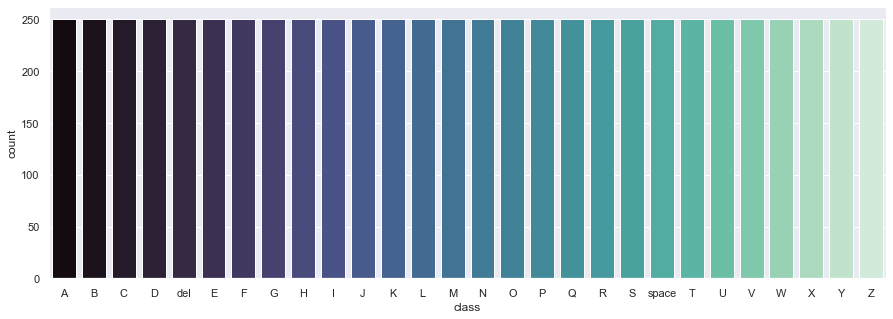

In [15]:
sns.countplot(x=df_test['class'], palette = "mako")

### Plotting correlation matrix
As we will see in a moments, there is quit a strong correalation between the features, thus, it is a good idea to apply PCA.

In [16]:
X = df_test.iloc[:, 1:].values
Y = df_test.iloc[:, 0].values 

<AxesSubplot:>

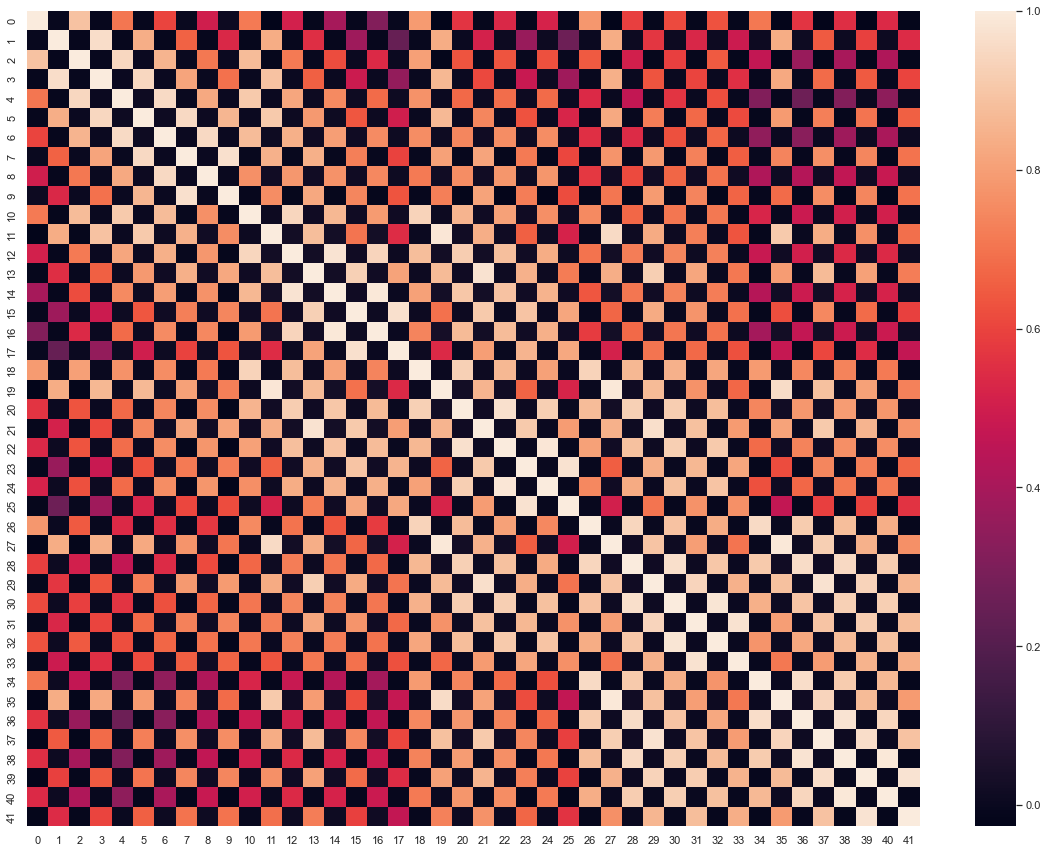

In [18]:
sns.set(rc={'figure.figsize':(20,15)})

X_df = pd.DataFrame(X)

sns.heatmap(X_df.corr())

### Getting data ready

In [19]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

Le = LabelEncoder()
Le.fit(Y)
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)

Ye = Le.transform(Y)

### Applying PCA

In [20]:
from sklearn.decomposition import PCA

pca = PCA().fit(Xs)

In [21]:
pca.explained_variance_ratio_

array([3.80770262e-01, 3.69566314e-01, 7.01344621e-02, 5.40614941e-02,
       3.37096453e-02, 2.60834337e-02, 1.46824874e-02, 1.24958965e-02,
       1.20322531e-02, 6.11947519e-03, 4.70948588e-03, 4.12743315e-03,
       3.21363153e-03, 2.46301743e-03, 1.94540685e-03, 1.17099630e-03,
       1.00586046e-03, 4.43963433e-04, 3.34192519e-04, 2.32599693e-04,
       1.55913040e-04, 1.04177811e-04, 8.35444771e-05, 6.58256588e-05,
       5.45044532e-05, 5.08986836e-05, 4.09607268e-05, 2.70281469e-05,
       2.51076487e-05, 2.35398590e-05, 1.40218427e-05, 1.27310081e-05,
       1.19771988e-05, 9.56130302e-06, 7.07625975e-06, 3.18800112e-06,
       2.95172966e-06, 1.34709578e-06, 1.07914926e-06, 8.73242178e-07,
       8.09056882e-07, 5.73418977e-07])

In [22]:
pca.components_

array([[ 1.80533500e-02,  1.76149917e-01,  2.14439909e-02, ...,
         2.25780831e-01,  2.36323920e-02,  2.09640842e-01],
       [-1.80134678e-01,  2.28505846e-02, -1.91996177e-01, ...,
         2.87529283e-02, -2.04325298e-01,  2.81290852e-02],
       [ 3.11936883e-03, -3.99720640e-02,  2.31081837e-01, ...,
        -3.31324944e-03, -2.97847837e-01, -1.08114394e-04],
       ...,
       [ 1.14547057e-02, -4.91863966e-03, -4.63001914e-02, ...,
         3.13782688e-01,  8.89804617e-02, -1.60235235e-01],
       [ 7.98171806e-03,  6.97262573e-03, -2.94591763e-02, ...,
        -6.67054111e-02,  1.07161744e-02,  3.56216370e-02],
       [ 5.96737387e-03,  4.26766390e-03, -2.08365232e-02, ...,
        -2.97279910e-01,  1.52962394e-01,  1.51938133e-01]])

In [23]:
pca.singular_values_

array([334.5840059 , 329.62478091, 143.59502726, 126.07172267,
        99.55217585,  87.57014052,  65.7012276 ,  60.6118271 ,
        59.47673842,  42.41610197,  37.21006382,  34.83482948,
        30.73772391,  26.90961025,  23.9154681 ,  18.55459276,
        17.19659776,  11.42476474,   9.91224498,   8.26948061,
         6.77040868,   5.53428191,   4.95601415,   4.39917534,
         4.0030375 ,   3.8683605 ,   3.47022387,   2.81891383,
         2.71691898,   2.63072586,   2.03037478,   1.93466182,
         1.87651178,   1.6766106 ,   1.44236624,   0.96812826,
         0.93156241,   0.62932198,   0.56326715,   0.50668846,
         0.48771172,   0.41059126])

#### Deciding on how many components
To decide how many principle components we want, we plot the cumulative sum of the eigenvalues.<br>
Our approch here is to choose the number of principle components above which the added variance does not varies by much.

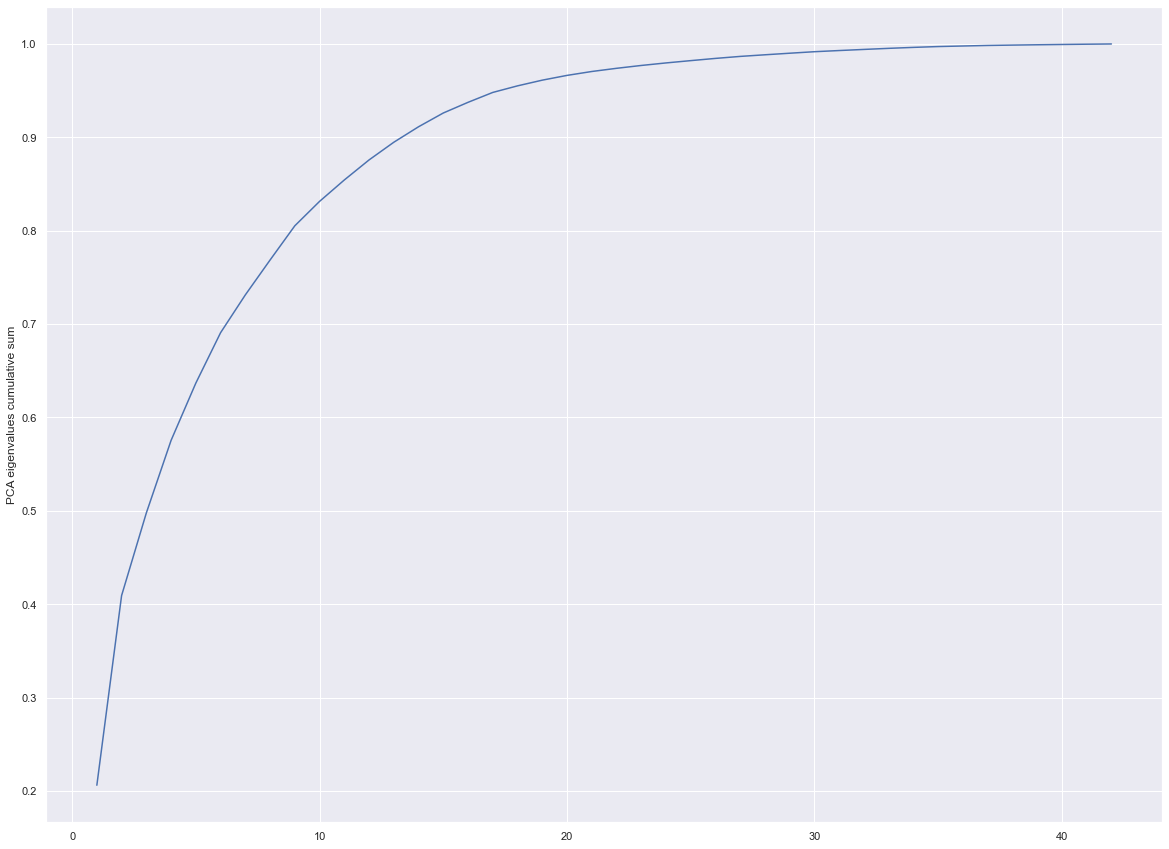

In [24]:
pca_cumsum = np.cumsum(pca.singular_values_)

plt.plot(range(1,len(pca_cumsum)+1),pca_cumsum/pca_cumsum[-1])
plt.ylabel("PCA eigenvalues cumulative sum")

plt.show()

#### Choosing the number of components
In our case we choose the number of components at which the value of the cummulative sum of the variance reached 95% of it's final value (close by 5% to the final value).

In [25]:
print(
    pca_cumsum[-1],'\n', 
    pca_cumsum[-1] - pca_cumsum[-1]*0.05, '\n',
    pca_cumsum[16]
)

1622.7949816777939 
 1541.6552325939042 
 1538.5626342708654


In [26]:
pca = PCA(n_components = 16).fit(Xs)

In [27]:
X_pca = pca.transform(Xs)
X_pca.shape

(7000, 16)

### Spliting Training/Testing sets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.35, stratify = Y)

## K-Nearest Neighbors (Not the best but decent enough)  

### Creating model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [30]:
y_pred = knn.predict(X_test)

### Evaluating model

In [31]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.48      0.66      0.56        88
           B       0.72      0.95      0.82        87
           C       0.75      0.91      0.82        88
           D       0.89      0.83      0.86        87
           E       0.53      0.74      0.62        87
           F       0.96      0.91      0.94        88
           G       0.89      0.95      0.92        87
           H       0.94      0.90      0.92        87
           I       0.88      0.69      0.77        87
           J       0.95      0.79      0.86        87
           K       0.43      0.61      0.51        88
           L       0.74      0.89      0.81        88
           M       0.70      0.61      0.65        87
           N       0.73      0.72      0.72        88
           O       0.81      0.62      0.71        88
           P       0.84      0.85      0.85        87
           Q       0.83      0.67      0.74        88
           R       0.43    

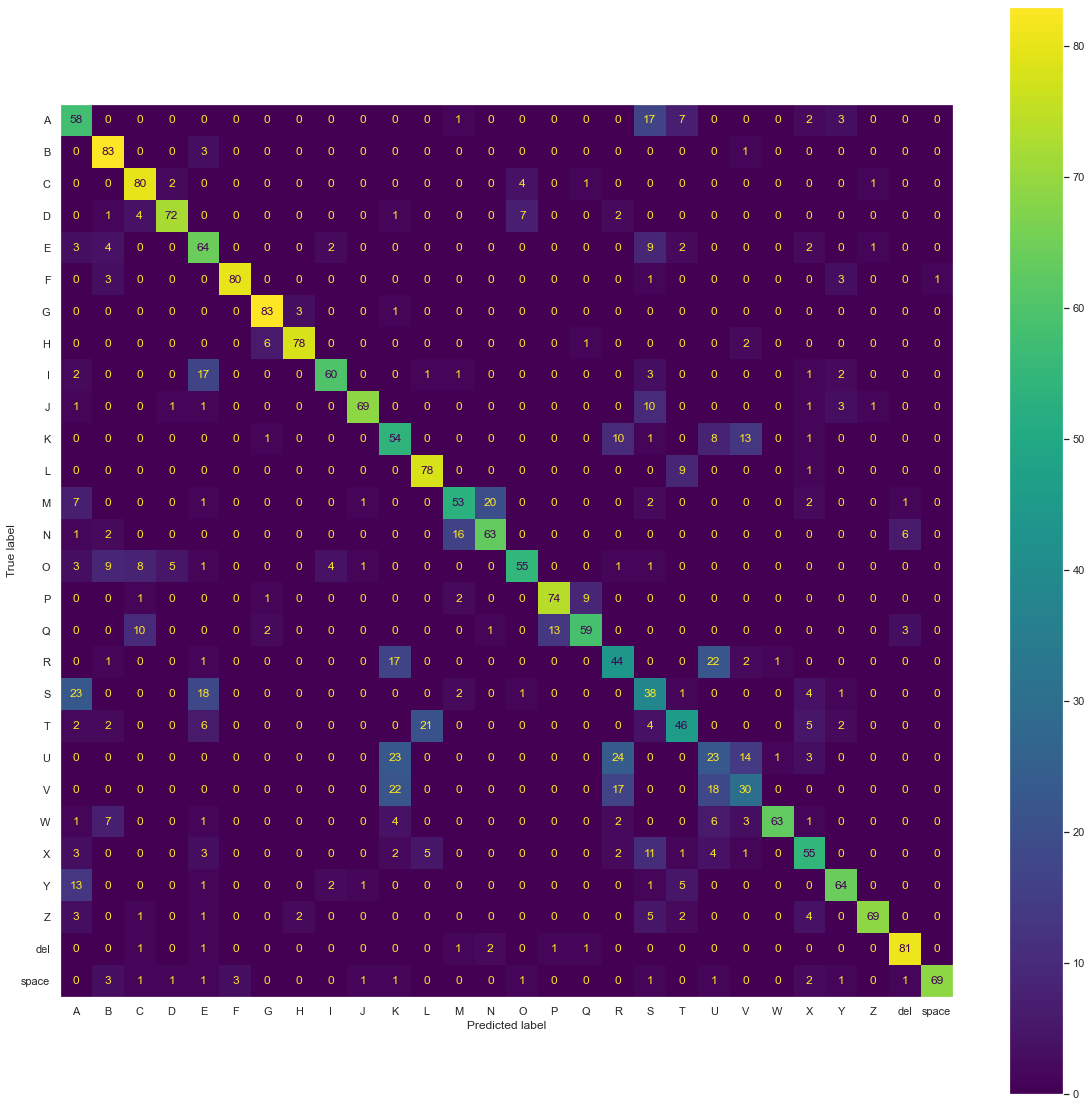

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)

fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax = ax)
plt.grid(False)
plt.show()

### Model complexity and overfitting/underfitting

In [33]:
neighbors = range(1,26)

train_accuracies = {}
test_accuracies = {}

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_accuracies[i] = knn.score(X_train, y_train)
    test_accuracies[i] = knn.score(X_test, y_test)

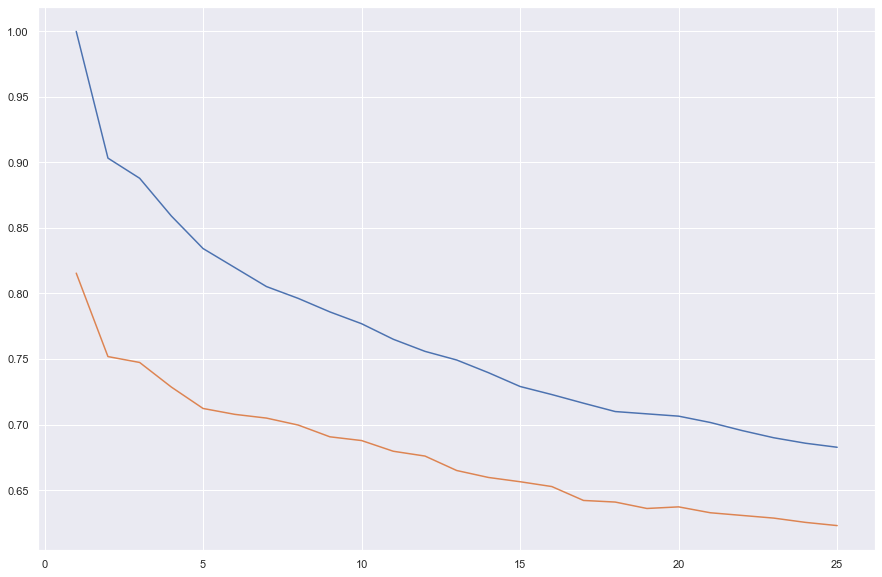

In [34]:
plt.figure(figsize = (15,10))
plt.plot(neighbors, train_accuracies.values())
plt.plot(neighbors, test_accuracies.values())
plt.show()

### Hyperparater Tunning

In [35]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

cv_results = cross_val_score(KNeighborsClassifier(), X_pca, Y, cv = kf)

In [36]:
cv_results

array([0.74928571, 0.75071429, 0.75357143, 0.72357143, 0.74357143])

In [37]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': np.arange(1,11),
    'p': [1,2],
    'weights' : ['uniform', 'distance'],
    
# Other parameters might include
#     'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = kf)

knn_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [39]:
print(knn_cv.best_estimator_.get_params(),'\n', knn_cv.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} 
 0.8707692307692307


### Model Deployement (Real time demo)

In [40]:
knn = KNeighborsClassifier(n_neighbors=1, p=1, weights='uniform')
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, p=1)

In [41]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands = 1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # Mark the image as not writeable to improve performance
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                coords = pca.transform(coords)
                
                predicted = knn.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (150, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        image = cv2.resize(image, (int(1.5*image.shape[1]),int(1.5*image.shape[0])), interpolation=cv2.INTER_AREA)
        
        cv2.imshow('MediaPipe Hands', image)

        # Press q to close webcam
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Random forest (the most prone to overfitting)

### Creating model

In [42]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
y_pred = rfc.predict(X_test)

### Evaluating model

In [44]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.95      0.95      0.95        88
           B       0.97      1.00      0.98        87
           C       1.00      0.99      0.99        88
           D       0.97      0.95      0.96        87
           E       0.97      0.95      0.96        87
           F       0.95      0.94      0.95        88
           G       0.92      0.99      0.96        87
           H       0.99      0.92      0.95        87
           I       0.99      0.94      0.96        87
           J       1.00      0.95      0.98        87
           K       0.99      0.93      0.96        88
           L       0.98      1.00      0.99        88
           M       0.84      0.90      0.87        87
           N       0.94      0.88      0.91        88
           O       0.89      1.00      0.94        88
           P       1.00      0.98      0.99        87
           Q       0.97      0.98      0.97        88
           R       0.88    

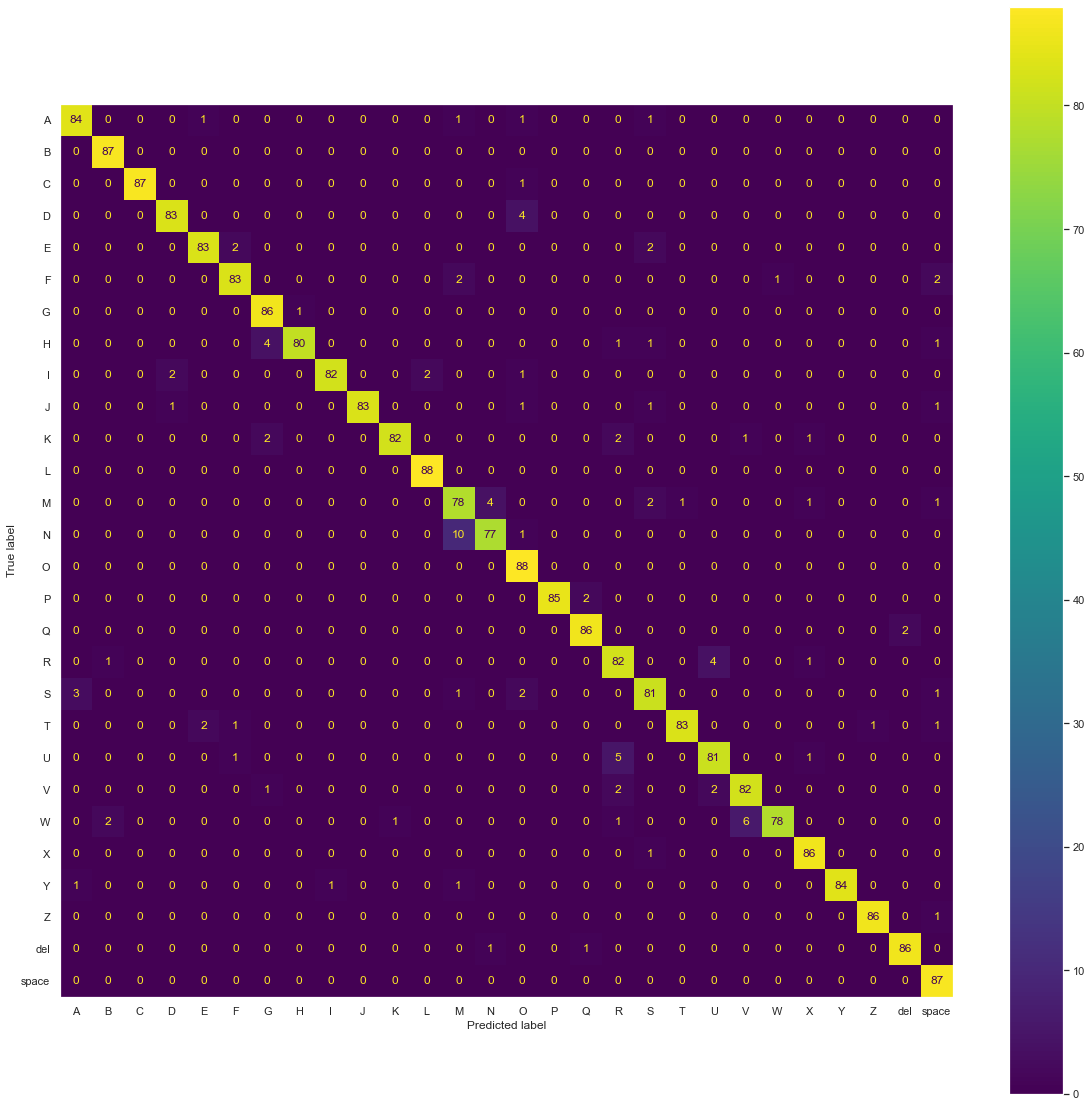

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)

fig, ax = plt.subplots(figsize=(20,20))
disp.plot(ax = ax)
plt.grid(False)
plt.show()

### Model complexity and overfitting/underfitting
This section really showcase the problem of overfitting in RandomForest models.

In [46]:
from sklearn.metrics import mean_squared_error
n_estimators = range(100,501,50)

train_accuracies = {}
test_accuracies = {}

for i in n_estimators:
    rfc = RandomForestClassifier(i)
    rfc.fit(X_train, y_train)
    
    train_accuracies[i] = rfc.score(X_train, y_train)
    test_accuracies[i] = rfc.score(X_test, y_test)

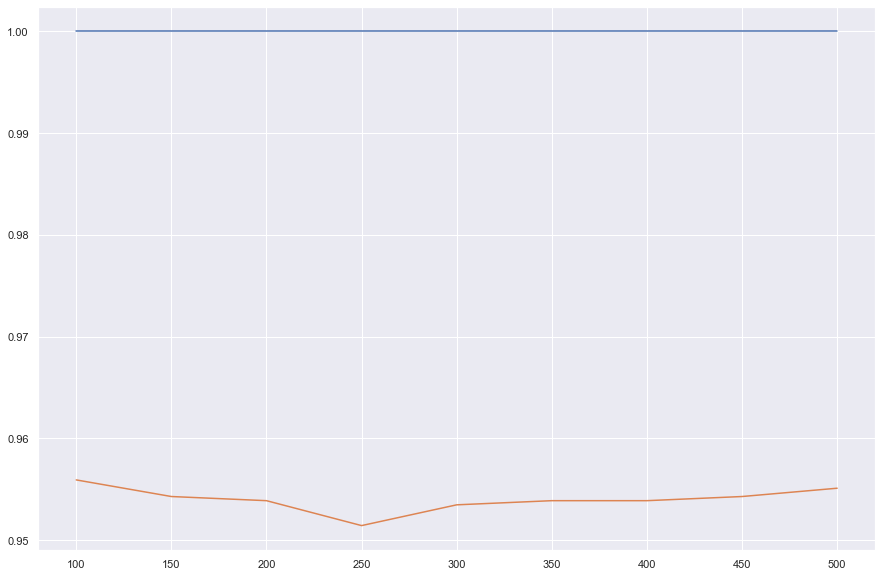

In [47]:
plt.figure(figsize = (15,10))
plt.plot(n_estimators, train_accuracies.values())
plt.plot(n_estimators, test_accuracies.values())
plt.show()

### Hyperparater Tunning

In [48]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

cv_results = cross_val_score(RandomForestClassifier(), X_pca, Ye, cv = kf)

In [49]:
cv_results

array([0.95285714, 0.95428571, 0.96428571, 0.95071429, 0.95642857])

In [50]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [200, 500],
    'max_depth' : [3,5,10],
    'criterion' :['gini', 'entropy']
    
# Run those if you have 1000 years to live
#     'bootstrap': [True, False],
#     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10],
#     'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

}

rfc = RandomForestClassifier()
rfc_cv = GridSearchCV(rfc, param_grid, cv = kf)

rfc_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'n_estimators': [200, 500]})

In [52]:
print(rfc_cv.best_estimator_.get_params(),'\n', rfc_cv.best_score_)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 
 0.940879120879121


### Model Deployement (Real time demo)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion = 'entropy', max_depth= 10, n_estimators= 500)

rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [54]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands = 1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # Mark the image as not writeable to improve performance
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                coords = pca.transform(coords)
                
                predicted = rfc.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (150, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        image = cv2.resize(image, (int(1.5*image.shape[1]),int(1.5*image.shape[0])), interpolation=cv2.INTER_AREA)

        cv2.imshow('MediaPipe Hands', image)

        # Press q to close webcam
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Support Vector Classifier (things are getting better, hopefully)

### Creating model

In [55]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train,y_train)

SVC()

In [56]:
y_pred = svc.predict(X_test)

### Evaluating model

In [57]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.83      0.74      0.78        88
           B       0.87      0.98      0.92        87
           C       0.89      0.95      0.92        88
           D       0.96      0.85      0.90        87
           E       0.92      0.89      0.90        87
           F       0.95      0.94      0.95        88
           G       0.91      0.98      0.94        87
           H       0.96      0.91      0.93        87
           I       0.93      0.89      0.91        87
           J       0.90      0.87      0.89        87
           K       0.86      0.57      0.68        88
           L       0.99      0.97      0.98        88
           M       0.78      0.60      0.68        87
           N       0.71      0.77      0.74        88
           O       0.84      0.91      0.87        88
           P       0.99      0.94      0.96        87
           Q       0.95      0.90      0.92        88
           R       0.47    

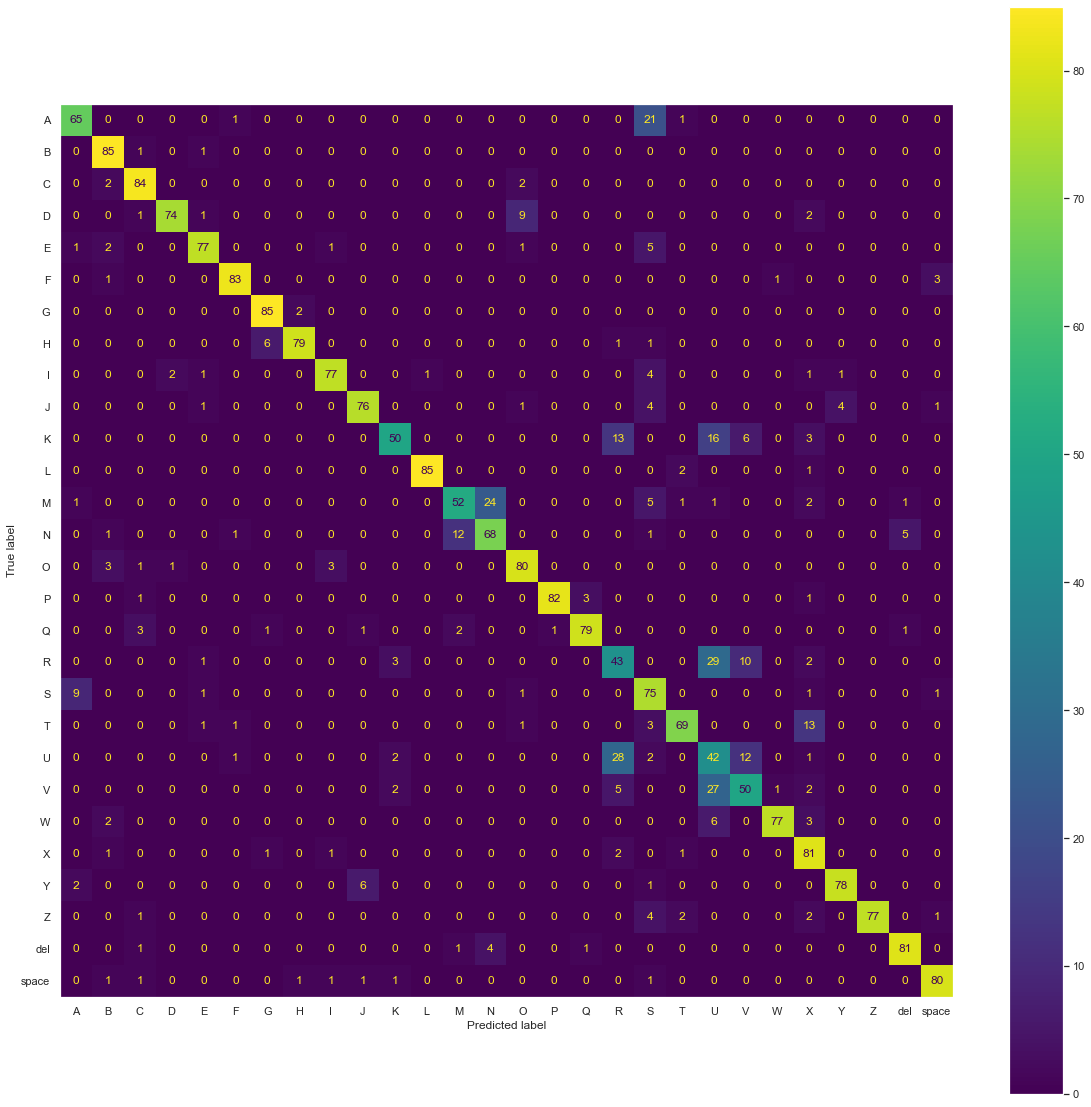

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)

fig, ax = plt.subplots(figsize=(20,20))
plt.grid(False)
disp.plot(ax = ax)
plt.show()

### Model complexity and overfitting/underfitting

In [59]:
from sklearn.metrics import mean_squared_error
C_param = range(1,11)

train_accuracies = {}
test_accuracies = {}

for c in C_param:
    svc = SVC(C = c)
    svc.fit(X_train, y_train)
    
    train_accuracies[c] = svc.score(X_train, y_train)
    test_accuracies[c] = svc.score(X_test, y_test)

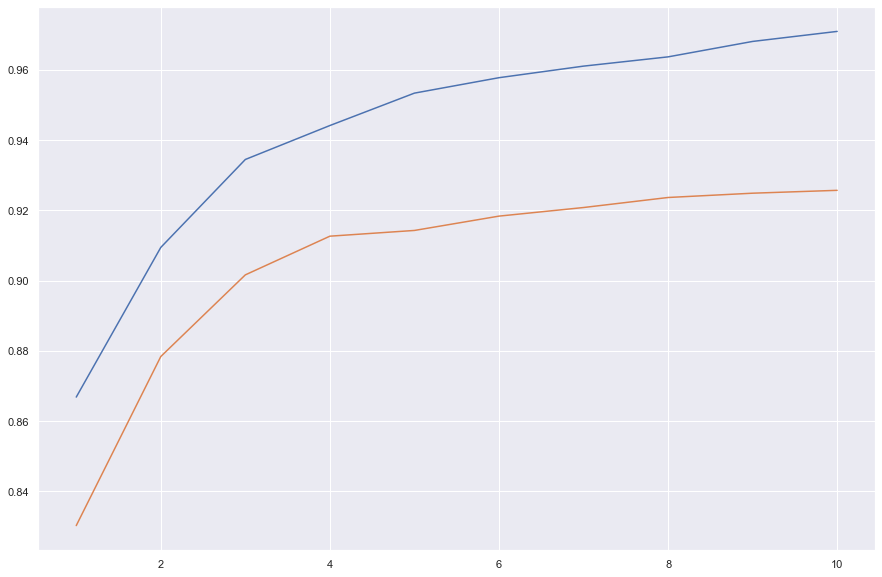

In [60]:
plt.figure(figsize = (15,10))
plt.plot(C_param, train_accuracies.values())
plt.plot(C_param, test_accuracies.values())
plt.show()

### Hyperparater Tunning

In [61]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True)

cv_results = cross_val_score(SVC(), X_pca, Ye, cv = kf)

In [62]:
cv_results

array([0.85857143, 0.835     , 0.84214286, 0.83714286, 0.855     ])

In [63]:
svc.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 3, 5, 10],
    'decision_function_shape': ['ovo', 'ovr'],
    'kernel': ['linear', 'poly', 'rbf'],
    'tol': [0.001, 0.005, 0.01]
    
# Other parameters might include    
#     'degree': np.arange(1,6),
#     'gamma': ['scale', 'auto'],

}

svc = SVC()
svc_cv = GridSearchCV(svc, param_grid)

svc_cv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 3, 5, 10],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'tol': [0.001, 0.005, 0.01]})

In [65]:
print(svc_cv.best_estimator_.get_params(),'\n', svc_cv.best_score_)

{'C': 3, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
 0.9235164835164836


### Model Deployement (Real time demo)

In [66]:
svc = SVC(C=10, decision_function_shape='ovo', kernel='linear', tol= 0.001)

svc.fit(X_train, y_train)

SVC(C=10, decision_function_shape='ovo', kernel='linear')

In [67]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands = 1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # Mark the image as not writeable to improve performance
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                coords = pca.transform(coords)
                
                predicted = svc.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (150, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        image = cv2.resize(image, (int(1.5*image.shape[1]),int(1.5*image.shape[0])), interpolation=cv2.INTER_AREA)

        cv2.imshow('MediaPipe Hands', image)

        # Press q to close webcam
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

## Neural Network (The best one of them all)

In [68]:
X_train_nn = np.array(X_train)

ye = Le.transform(y_train)
y_train_nn = np.array(ye) 

In [69]:
model = tf.keras.Sequential([
    keras.layers.Input(shape=(None,1,16), dtype=tf.float32),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dropout(0.05),
    keras.layers.Dense(28, activation = 'softmax')
])

model.compile(optimizer='adam', 
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [70]:
history = model.fit(x = X_train_nn, y = y_train_nn, epochs = 50)

Epoch 1/50
143/143 [==============================] - 2s 5ms/step - loss: 2.8497 - accuracy: 0.1609
Epoch 2/50
143/143 [==============================] - 0s 3ms/step - loss: 1.4695 - accuracy: 0.5152
Epoch 3/50
143/143 [==============================] - 0s 3ms/step - loss: 1.0200 - accuracy: 0.6589
Epoch 4/50
143/143 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.7407
Epoch 5/50
143/143 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.7664
Epoch 6/50
143/143 [==============================] - 0s 3ms/step - loss: 0.5585 - accuracy: 0.8198
Epoch 7/50
143/143 [==============================] - 1s 4ms/step - loss: 0.5236 - accuracy: 0.8202
Epoch 8/50
143/143 [==============================] - 1s 5ms/step - loss: 0.4556 - accuracy: 0.8411
Epoch 9/50
143/143 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.8598
Epoch 10/50
143/143 [==============================] - 1s 6ms/step - loss: 0.3818 - accuracy: 0.8657

### Hyperparamter tunning with Keras tunner

In [71]:
import keras_tuner as kt

def model_builder(hp):
    model = keras.Sequential()
    
    model.add(keras.layers.Input(shape=(None,1,16), dtype=tf.float32))
    
    hp_layers = hp.Int('nb_layers', min_value = 4, max_value = 10)
    hp_neurons = hp.Int('nb_neurons', min_value = 32, max_value = 256, step=32)
    hp_dropout = hp.Choice('dropout_rate', values=[0.01, 0.05, 0.1])
    
    for i in range(hp_layers):    
        model.add(keras.layers.Dense(units = hp_neurons, activation = 'relu'))
        model.add(keras.layers.Dropout(rate = hp_dropout))
        
    model.add(keras.layers.Dense(28, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    
    return model

In [72]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_loss',
    max_epochs=25,
    directory='my_dir',
    project_name='kt_tuning')

INFO:tensorflow:Reloading Tuner from my_dir\kt_tuning\tuner0.json


In [73]:
tuner.search(X_train_nn, y_train_nn, epochs=3, validation_split=0.3)
# best_model = tuner.get_best_models()[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

INFO:tensorflow:Oracle triggered exit


In [74]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_nn, y_train_nn, epochs=50, validation_split=0.3)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
100/100 [==============================] - 2s 12ms/step - loss: 2.5423 - accuracy: 0.2336 - val_loss: 1.2420 - val_accuracy: 0.5963
Epoch 2/50
100/100 [==============================] - 1s 10ms/step - loss: 1.0590 - accuracy: 0.6411 - val_loss: 0.6717 - val_accuracy: 0.8015
Epoch 3/50
100/100 [==============================] - 1s 10ms/step - loss: 0.7128 - accuracy: 0.7639 - val_loss: 0.5168 - val_accuracy: 0.8520
Epoch 4/50
100/100 [==============================] - 1s 11ms/step - loss: 0.5364 - accuracy: 0.8257 - val_loss: 0.4110 - val_accuracy: 0.8769
Epoch 5/50
100/100 [==============================] - 1s 11ms/step - loss: 0.4558 - accuracy: 0.8477 - val_loss: 0.3905 - val_accuracy: 0.8857
Epoch 6/50
100/100 [==============================] - 1s 10ms/step - loss: 0.3609 - accuracy: 0.8832 - val_loss: 0.3684 - val_accuracy: 0.8828
Epoch 7/50
100/100 [==============================] - 1s 11ms/step - loss: 0.3284 - accuracy: 0.8901 - val_loss: 0.3049 - val_accuracy: 0.9070

In [75]:
hypermodel = tuner.hypermodel.build(best_hps)

hypermodel.fit(X_train_nn, y_train_nn, epochs=best_epoch)

Epoch 1/35
143/143 [==============================] - 2s 8ms/step - loss: 2.2354 - accuracy: 0.3108
Epoch 2/35
143/143 [==============================] - 1s 8ms/step - loss: 0.8129 - accuracy: 0.7312
Epoch 3/35
143/143 [==============================] - 1s 7ms/step - loss: 0.5517 - accuracy: 0.8279
Epoch 4/35
143/143 [==============================] - 1s 7ms/step - loss: 0.4550 - accuracy: 0.8486
Epoch 5/35
143/143 [==============================] - 1s 8ms/step - loss: 0.3673 - accuracy: 0.8749
Epoch 6/35
143/143 [==============================] - 1s 7ms/step - loss: 0.2970 - accuracy: 0.8941
Epoch 7/35
143/143 [==============================] - 1s 7ms/step - loss: 0.2716 - accuracy: 0.9092
Epoch 8/35
143/143 [==============================] - 1s 7ms/step - loss: 0.2553 - accuracy: 0.9097
Epoch 9/35
143/143 [==============================] - 1s 7ms/step - loss: 0.2115 - accuracy: 0.9273
Epoch 10/35
143/143 [==============================] - 1s 7ms/step - loss: 0.2152 - accuracy: 0.9279

### Visualising The Neural Network

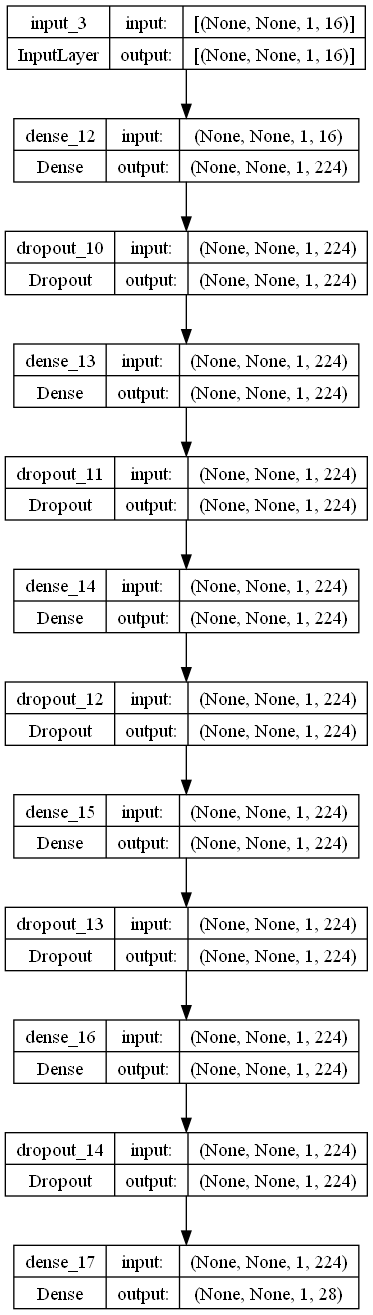

In [76]:
from keras.utils.vis_utils import plot_model

plot_model(hypermodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Model Deployement (Real time demo)

In [77]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

cap = cv2.VideoCapture(0)

with mp_hands.Hands(max_num_hands = 1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # Mark the image as not writeable to improve performance
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                coords = pca.transform(coords)
            
                
                predicted = hypermodel.predict(coords,verbose = 0)
                predicted = predicted.argmax()

            # Get status box
            cv2.rectangle(image, (0,0), (150, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(Le.inverse_transform([predicted])[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        image = cv2.resize(image, (int(1.5*image.shape[1]),int(1.5*image.shape[0])), interpolation=cv2.INTER_AREA)

        cv2.imshow('MediaPipe Hands', image)

        # Press q to close webcam
        if cv2.waitKey(5) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

# <center><b><h1>Thank You</h1></b></center>